In [3]:


# Install required packages
!pip install xgboost scikit-learn pandas numpy matplotlib seaborn mlxtend -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# For Apriori
from mlxtend.frequent_patterns import apriori, association_rules

# For saving models
import pickle
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"📅 Project started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\n" + "="*70)
print("STUDENT DISENGAGEMENT PREDICTOR")
print("Complete Pipeline: Data Cleaning → Feature Engineering → Modeling")
print("="*70)


/opt/anaconda3/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=79877) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


✅ All libraries imported successfully!
📅 Project started: 2025-11-27 14:52:27

STUDENT DISENGAGEMENT PREDICTOR
Complete Pipeline: Data Cleaning → Feature Engineering → Modeling


In [5]:
info = pd.read_csv('archive[1]/studentInfo.csv')
reg = pd.read_csv('archive[1]/studentRegistration.csv')
assess = pd.read_csv('archive[1]/studentAssessment.csv')
vle = pd.read_csv('archive[1]/studentVle.csv')
print(f"""
📊 DATASET SUMMARY:
   • studentInfo: {info.shape[0]:,} rows, {info.shape[1]} columns
   • studentRegistration: {reg.shape[0]:,} rows, {reg.shape[1]} columns
   • studentAssessment: {assess.shape[0]:,} rows, {assess.shape[1]} columns
   • studentVle: {vle.shape[0]:,} rows, {vle.shape[1]} columns
   
   Total data points: {info.shape[0] + reg.shape[0] + assess.shape[0] + vle.shape[0]:,} rows
    """)


📊 DATASET SUMMARY:
   • studentInfo: 32,593 rows, 12 columns
   • studentRegistration: 32,593 rows, 5 columns
   • studentAssessment: 173,912 rows, 5 columns
   • studentVle: 10,655,280 rows, 6 columns
   
   Total data points: 10,894,378 rows
    


In [6]:

print("="*70)
print("DATASET OVERVIEW")
print("="*70)

# studentInfo
print("\n📊 1. STUDENT INFO (Demographics)")
print(f"Shape: {info.shape}")
print(f"Columns: {info.columns.tolist()}")
print("\nFirst few rows:")
display(info.head())
print("\nData types:")
print(info.dtypes)
print("\nMissing values:")
print(info.isnull().sum())
print("\nTarget variable distribution:")
if 'final_result' in info.columns:
    print(info['final_result'].value_counts())
    print("\nPercentages:")
    print(info['final_result'].value_counts(normalize=True) * 100)

# studentRegistration
print("\n" + "="*70)
print("📊 2. STUDENT REGISTRATION (Enrollment Dates)")
print(f"Shape: {reg.shape}")
print(f"Columns: {reg.columns.tolist()}")
print("\nFirst few rows:")
display(reg.head())
print("\nMissing values:")
print(reg.isnull().sum())

# studentAssessment
print("\n" + "="*70)
print("📊 3. STUDENT ASSESSMENT (Grades)")
print(f"Shape: {assess.shape}")
print(f"Columns: {assess.columns.tolist()}")
print("\nFirst few rows:")
display(assess.head())
print("\nMissing values:")
print(assess.isnull().sum())
print("\nScore statistics:")
if 'score' in assess.columns:
    print(assess['score'].describe())

# studentVle
print("\n" + "="*70)
print("📊 4. STUDENT VLE (Clickstream Data)")
print(f"Shape: {vle.shape}")
print(f"Columns: {vle.columns.tolist()}")
print("\nFirst few rows:")
display(vle.head())
print("\nMissing values:")
print(vle.isnull().sum())

print("\n" + "="*70)
print("✅ Data exploration complete!")
print("="*70)

DATASET OVERVIEW

📊 1. STUDENT INFO (Demographics)
Shape: (32593, 12)
Columns: ['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']

First few rows:


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass



Data types:
code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

Missing values:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Target variable distribution:
final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64

Percentages:
final_result
Pass           37.925321
Withdrawn      31

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN



Missing values:
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

📊 3. STUDENT ASSESSMENT (Grades)
Shape: (173912, 5)
Columns: ['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score']

First few rows:


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0



Missing values:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Score statistics:
count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

📊 4. STUDENT VLE (Clickstream Data)
Shape: (10655280, 6)
Columns: ['code_module', 'code_presentation', 'id_student', 'id_site', 'date', 'sum_click']

First few rows:


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1



Missing values:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

✅ Data exploration complete!


In [7]:

print("="*70)
print("🧹 DATA CLEANING")
print("="*70)

# ──────────────────────────────────────────────────────────────────
# 1. CLEAN studentInfo
# ──────────────────────────────────────────────────────────────────
print("\n[1/4] Cleaning studentInfo...")

# Remove duplicates
before = info.shape[0]
info = info.drop_duplicates()
after = info.shape[0]
print(f"   - Removed {before - after} duplicate rows")

# Handle missing values in categorical columns
categorical_cols = ['gender', 'region', 'age_band', 'highest_education', 'disability']
for col in categorical_cols:
    if col in info.columns:
        missing = info[col].isnull().sum()
        if missing > 0:
            print(f"   - Filling {missing} missing values in '{col}' with 'Unknown'")
            info[col] = info[col].fillna('Unknown')

# Normalize text (lowercase and strip spaces)
text_cols = info.select_dtypes(include='object').columns
for col in text_cols:
    if col not in ['code_module', 'code_presentation', 'final_result']:
        info[col] = info[col].astype(str).str.strip().str.lower()

# Encode gender
if 'gender' in info.columns:
    info['gender_val'] = info['gender'].map({
        'm': 0, 'male': 0,
        'f': 1, 'female': 1,
        'unknown': 2
    }).fillna(2).astype(int)
    print(f"   - Created 'gender_val' column")

print("✅ studentInfo cleaned")

# ──────────────────────────────────────────────────────────────────
# 2. CLEAN studentRegistration
# ──────────────────────────────────────────────────────────────────
print("\n[2/4] Cleaning studentRegistration...")

# Remove duplicates
before = reg.shape[0]
reg = reg.drop_duplicates()
after = reg.shape[0]
print(f"   - Removed {before - after} duplicate rows")

# Convert dates to numeric
if 'date_registration' in reg.columns:
    reg['date_registration'] = pd.to_numeric(reg['date_registration'], errors='coerce').fillna(0)
    print("   - Converted date_registration to numeric")

if 'date_unregistration' in reg.columns:
    reg['date_unregistration'] = pd.to_numeric(reg['date_unregistration'], errors='coerce')
    print("   - Converted date_unregistration to numeric")

print("✅ studentRegistration cleaned")

# ──────────────────────────────────────────────────────────────────
# 3. CLEAN studentAssessment
# ──────────────────────────────────────────────────────────────────
print("\n[3/4] Cleaning studentAssessment...")

# Remove duplicates
before = assess.shape[0]
assess = assess.drop_duplicates()
after = assess.shape[0]
print(f"   - Removed {before - after} duplicate rows")

# Convert score to numeric and handle missing
if 'score' in assess.columns:
    assess['score'] = pd.to_numeric(assess['score'], errors='coerce').fillna(0)
    print("   - Converted scores to numeric (missing → 0)")

# Convert date_submitted to numeric
if 'date_submitted' in assess.columns:
    assess['date_submitted'] = pd.to_numeric(assess['date_submitted'], errors='coerce').fillna(0)
    print("   - Converted date_submitted to numeric")

print("✅ studentAssessment cleaned")

# ──────────────────────────────────────────────────────────────────
# 4. CLEAN studentVle
# ──────────────────────────────────────────────────────────────────
print("\n[4/4] Cleaning studentVle (this may take a moment due to size)...")

# Remove duplicates
before = vle.shape[0]
vle = vle.drop_duplicates()
after = vle.shape[0]
print(f"   - Removed {before - after} duplicate rows")

# Ensure numeric columns
if 'sum_click' in vle.columns:
    vle['sum_click'] = pd.to_numeric(vle['sum_click'], errors='coerce').fillna(0)
    print("   - Converted sum_click to numeric")

if 'date' in vle.columns:
    vle['date'] = pd.to_numeric(vle['date'], errors='coerce').fillna(0)
    print("   - Converted date to numeric")

print("✅ studentVle cleaned")

print("\n" + "="*70)
print("✅ ALL DATASETS CLEANED!")
print("="*70)
print(f"\nCleaned shapes:")
print(f"   studentInfo: {info.shape}")
print(f"   studentRegistration: {reg.shape}")
print(f"   studentAssessment: {assess.shape}")
print(f"   studentVle: {vle.shape}")

🧹 DATA CLEANING

[1/4] Cleaning studentInfo...
   - Removed 0 duplicate rows
   - Created 'gender_val' column
✅ studentInfo cleaned

[2/4] Cleaning studentRegistration...
   - Removed 0 duplicate rows
   - Converted date_registration to numeric
   - Converted date_unregistration to numeric
✅ studentRegistration cleaned

[3/4] Cleaning studentAssessment...
   - Removed 0 duplicate rows
   - Converted scores to numeric (missing → 0)
   - Converted date_submitted to numeric
✅ studentAssessment cleaned

[4/4] Cleaning studentVle (this may take a moment due to size)...
   - Removed 787170 duplicate rows
   - Converted sum_click to numeric
   - Converted date to numeric
✅ studentVle cleaned

✅ ALL DATASETS CLEANED!

Cleaned shapes:
   studentInfo: (32593, 13)
   studentRegistration: (32593, 5)
   studentAssessment: (173912, 5)
   studentVle: (9868110, 6)


In [8]:

print("="*70)
print("⚙️ FEATURE ENGINEERING")
print("="*70)

# ──────────────────────────────────────────────────────────────────
# 1. ASSESSMENT FEATURES (Performance)
# ──────────────────────────────────────────────────────────────────
print("\n[1/3] Creating assessment features...")

assess_features = assess.groupby('id_student').agg(
    avg_score=('score', 'mean'),
    max_score=('score', 'max'),
    min_score=('score', 'min'),
    submission_count=('id_assessment', 'count'),
    total_score=('score', 'sum')
).reset_index()

# Calculate late submissions if date info exists
if 'date_submitted' in assess.columns:
    assess_features['avg_days_to_submit'] = assess.groupby('id_student')['date_submitted'].mean().values

print(f"   ✅ Created {len(assess_features.columns)-1} assessment features")
print(f"   Features: {assess_features.columns.tolist()[1:]}")

# ──────────────────────────────────────────────────────────────────
# 2. VLE FEATURES (Engagement/Activity)
# ──────────────────────────────────────────────────────────────────
print("\n[2/3] Creating VLE features (this takes time with large data)...")

vle_features = vle.groupby('id_student').agg(
    total_clicks=('sum_click', 'sum'),
    days_active=('date', 'nunique'),
    avg_clicks_per_day=('sum_click', 'mean'),
    max_clicks_single_day=('sum_click', 'max'),
    activity_sessions=('date', 'count')
).reset_index()

# Calculate engagement consistency
vle_features['click_consistency'] = vle_features['total_clicks'] / (vle_features['days_active'] + 1)

print(f"   ✅ Created {len(vle_features.columns)-1} VLE features")
print(f"   Features: {vle_features.columns.tolist()[1:]}")

# ──────────────────────────────────────────────────────────────────
# 3. REGISTRATION FEATURES (Time-based)
# ──────────────────────────────────────────────────────────────────
print("\n[3/3] Creating registration features...")

# Calculate days active in course
if 'date_registration' in reg.columns and 'date_unregistration' in reg.columns:
    max_course_duration = 365
    reg['days_enrolled'] = np.where(
        reg['date_unregistration'].isna(),
        max_course_duration - reg['date_registration'],
        reg['date_unregistration'] - reg['date_registration']
    )
    reg['days_enrolled'] = reg['days_enrolled'].clip(lower=0)
    print("   ✅ Created 'days_enrolled' feature")

# Early vs late registration
if 'date_registration' in reg.columns:
    reg['early_registration'] = (reg['date_registration'] < reg['date_registration'].median()).astype(int)
    print("   ✅ Created 'early_registration' feature")

print("\n" + "="*70)
print("✅ FEATURE ENGINEERING COMPLETE!")
print("="*70)

# Display sample features
print("\n📊 Sample Assessment Features:")
display(assess_features.head())
print("\n📊 Sample VLE Features:")
display(vle_features.head())

⚙️ FEATURE ENGINEERING

[1/3] Creating assessment features...
   ✅ Created 6 assessment features
   Features: ['avg_score', 'max_score', 'min_score', 'submission_count', 'total_score', 'avg_days_to_submit']

[2/3] Creating VLE features (this takes time with large data)...
   ✅ Created 6 VLE features
   Features: ['total_clicks', 'days_active', 'avg_clicks_per_day', 'max_clicks_single_day', 'activity_sessions', 'click_consistency']

[3/3] Creating registration features...
   ✅ Created 'days_enrolled' feature
   ✅ Created 'early_registration' feature

✅ FEATURE ENGINEERING COMPLETE!

📊 Sample Assessment Features:


,id_student,avg_score,max_score,min_score,submission_count,total_score,avg_days_to_submit
0,6516,61.800000,77.0,48.0,5,309.0,111.600000
1,8462,87.000000,93.0,83.0,7,609.0,23.000000
2,11391,82.000000,85.0,78.0,5,410.0,112.400000
3,23629,82.500000,100.0,63.0,4,330.0,55.750000
4,23698,74.444444,94.0,56.0,9,670.0,133.444444



📊 Sample VLE Features:


,id_student,total_clicks,days_active,avg_clicks_per_day,max_clicks_single_day,activity_sessions,click_consistency
0,6516,2715,159,4.344000,49,625,16.968750
1,8462,643,56,2.172297,16,296,11.280702
2,11391,922,40,4.802083,76,192,22.487805
3,23629,153,16,3.000000,13,51,9.000000
4,23698,886,70,3.097902,78,286,12.478873


In [9]:

print("="*70)
print("🔗 MERGING DATASETS")
print("="*70)

# Start with base: studentInfo + studentRegistration
print("\n[1/3] Merging studentInfo + studentRegistration...")
merge_keys = ['id_student', 'code_module', 'code_presentation']

master_df = pd.merge(
    info,
    reg,
    on=merge_keys,
    how='inner'
)
print(f"   ✅ After base merge: {master_df.shape}")

# Add assessment features (LEFT JOIN - some students may have no assessments)
print("\n[2/3] Adding assessment features...")
master_df = pd.merge(
    master_df,
    assess_features,
    on='id_student',
    how='left'
)
print(f"   ✅ After assessment merge: {master_df.shape}")

# Add VLE features (LEFT JOIN - some students may have no clicks)
print("\n[3/3] Adding VLE features...")
master_df = pd.merge(
    master_df,
    vle_features,
    on='id_student',
    how='left'
)
print(f"   ✅ After VLE merge: {master_df.shape}")

# Fill NaN values for students with no activity
feature_cols = [
    'avg_score', 'max_score', 'min_score', 'submission_count', 'total_score',
    'total_clicks', 'days_active', 'avg_clicks_per_day', 'max_clicks_single_day',
    'activity_sessions', 'click_consistency'
]

existing_feature_cols = [col for col in feature_cols if col in master_df.columns]
master_df[existing_feature_cols] = master_df[existing_feature_cols].fillna(0)

print("\n" + "="*70)
print("✅ MASTER DATASET CREATED!")
print("="*70)
print(f"\nFinal shape: {master_df.shape}")
print(f"Total columns: {len(master_df.columns)}")
print(f"\nColumn names:")
print(master_df.columns.tolist())

print("\n📊 Master Dataset Preview:")
display(master_df.head())

print("\n📊 Data Types:")
print(master_df.dtypes)

print("\n📊 Missing Values:")
print(master_df.isnull().sum())

print("\n📊 Target Variable Distribution:")
if 'final_result' in master_df.columns:
    print(master_df['final_result'].value_counts())
    print("\nPercentages:")
    print(master_df['final_result'].value_counts(normalize=True) * 100)

🔗 MERGING DATASETS

[1/3] Merging studentInfo + studentRegistration...
   ✅ After base merge: (32593, 17)

[2/3] Adding assessment features...
   ✅ After assessment merge: (32593, 23)

[3/3] Adding VLE features...
   ✅ After VLE merge: (32593, 29)

✅ MASTER DATASET CREATED!

Final shape: (32593, 29)
Total columns: 29

Column names:
['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'gender_val', 'date_registration', 'date_unregistration', 'days_enrolled', 'early_registration', 'avg_score', 'max_score', 'min_score', 'submission_count', 'total_score', 'avg_days_to_submit', 'total_clicks', 'days_active', 'avg_clicks_per_day', 'max_clicks_single_day', 'activity_sessions', 'click_consistency']

📊 Master Dataset Preview:


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,gender_val,date_registration,date_unregistration,days_enrolled,early_registration,avg_score,max_score,min_score,submission_count,total_score,avg_days_to_submit,total_clicks,days_active,avg_clicks_per_day,max_clicks_single_day,activity_sessions,click_consistency
0,AAA,2013J,11391,m,east anglian region,he qualification,90-100%,55<=,0,240,n,Pass,0,-159.0,NaN,524.0,1,82.0,85.0,78.0,5.0,410.0,112.4,922.0,40.0,4.802083,76.0,192.0,22.487805
1,AAA,2013J,28400,f,scotland,he qualification,20-30%,35-55,0,60,n,Pass,1,-53.0,NaN,418.0,0,66.4,70.0,60.0,5.0,332.0,114.2,1409.0,80.0,3.403382,23.0,414.0,17.395062
2,AAA,2013J,30268,f,north western region,a level or equivalent,30-40%,35-55,0,60,y,Withdrawn,1,-92.0,12.0,104.0,1,0.0,0.0,0.0,0.0,0.0,NaN,260.0,12.0,3.611111,23.0,72.0,20.000000
3,AAA,2013J,31604,f,south east region,a level or equivalent,50-60%,35-55,0,60,n,Pass,1,-52.0,NaN,417.0,0,76.0,88.0,71.0,5.0,380.0,112.2,2007.0,123.0,3.306425,22.0,607.0,16.185484
4,AAA,2013J,32885,f,west midlands region,lower than a level,50-60%,0-35,0,60,n,Pass,1,-176.0,NaN,541.0,1,54.4,75.0,30.0,5.0,272.0,125.6,1012.0,70.0,3.020896,22.0,335.0,14.253521



📊 Data Types:
code_module               object
code_presentation         object
id_student                 int64
gender                    object
region                    object
highest_education         object
imd_band                  object
age_band                  object
num_of_prev_attempts       int64
studied_credits            int64
disability                object
final_result              object
gender_val                 int64
date_registration        float64
date_unregistration      float64
days_enrolled            float64
early_registration         int64
avg_score                float64
max_score                float64
min_score                float64
submission_count         float64
total_score              float64
avg_days_to_submit       float64
total_clicks             float64
days_active              float64
avg_clicks_per_day       float64
max_clicks_single_day    float64
activity_sessions        float64
click_consistency        float64
dtype: object

📊 Missing Val

In [10]:

print("="*70)
print("🕵️ ASSOCIATION RULE MINING (APRIORI)")
print("="*70)

# Create binary tags for Apriori
print("\n[1/3] Creating binary tags for pattern mining...")

apriori_df = pd.DataFrame()

# Target outcomes
apriori_df['Result_Fail'] = master_df['final_result'].isin(['Fail', 'Withdrawn'])
apriori_df['Result_Pass'] = master_df['final_result'].isin(['Pass', 'Distinction'])
apriori_df['Result_Distinction'] = master_df['final_result'] == 'Distinction'

# Activity levels
if 'total_clicks' in master_df.columns:
    q25 = master_df['total_clicks'].quantile(0.25)
    q75 = master_df['total_clicks'].quantile(0.75)
    apriori_df['Low_Activity'] = master_df['total_clicks'] < q25
    apriori_df['High_Activity'] = master_df['total_clicks'] > q75
    apriori_df['No_Activity'] = master_df['total_clicks'] == 0

# Performance levels
if 'avg_score' in master_df.columns:
    apriori_df['Low_Scores'] = master_df['avg_score'] < 50
    apriori_df['High_Scores'] = master_df['avg_score'] > 75
    apriori_df['No_Submissions'] = master_df['avg_score'] == 0

# Engagement patterns
if 'days_active' in master_df.columns:
    apriori_df['Rarely_Active'] = master_df['days_active'] < master_df['days_active'].quantile(0.25)
    apriori_df['Very_Active'] = master_df['days_active'] > master_df['days_active'].quantile(0.75)

# Registration timing
if 'date_registration' in master_df.columns:
    apriori_df['Late_Registration'] = master_df['date_registration'] < -50

# Demographics
if 'disability' in master_df.columns:
    apriori_df['Has_Disability'] = master_df['disability'].isin(['Y', 'y', 'yes'])

print(f"   ✅ Created {len(apriori_df.columns)} binary tags")
print(f"   Tags: {apriori_df.columns.tolist()}")

# Run Apriori algorithm
print("\n[2/3] Running Apriori algorithm...")
print("   (This may take a minute...)")

try:
    # Find frequent itemsets
    frequent_itemsets = apriori(apriori_df, min_support=0.05, use_colnames=True)
    print(f"   ✅ Found {len(frequent_itemsets)} frequent itemsets")
    
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    print(f"   ✅ Generated {len(rules)} association rules")
    
    # Filter and display interesting rules
    print("\n[3/3] Analyzing patterns...")
    
    # Rules leading to FAIL
    print("\n" + "="*70)
    print("🚨 TOP PATTERNS LEADING TO FAILURE:")
    print("="*70)
    fail_rules = rules[rules['consequents'].apply(lambda x: 'Result_Fail' in x)]
    if len(fail_rules) > 0:
        fail_rules_sorted = fail_rules.sort_values('lift', ascending=False).head(10)
        for idx, row in fail_rules_sorted.iterrows():
            antecedents = ', '.join(list(row['antecedents']))
            print(f"\n   IF: {antecedents}")
            print(f"   THEN: Likely to FAIL")
            print(f"   Support: {row['support']:.3f} | Confidence: {row['confidence']:.3f} | Lift: {row['lift']:.3f}")
    else:
        print("   No strong failure patterns found")
    
    # Rules leading to SUCCESS
    print("\n" + "="*70)
    print("🎯 TOP PATTERNS LEADING TO SUCCESS:")
    print("="*70)
    pass_rules = rules[rules['consequents'].apply(lambda x: 'Result_Pass' in x or 'Result_Distinction' in x)]
    if len(pass_rules) > 0:
        pass_rules_sorted = pass_rules.sort_values('lift', ascending=False).head(10)
        for idx, row in pass_rules_sorted.iterrows():
            antecedents = ', '.join(list(row['antecedents']))
            print(f"\n   IF: {antecedents}")
            print(f"   THEN: Likely to PASS/DISTINCTION")
            print(f"   Support: {row['support']:.3f} | Confidence: {row['confidence']:.3f} | Lift: {row['lift']:.3f}")
    else:
        print("   No strong success patterns found")
    
    # Save results
    rules.to_csv('Pattern_Mining_Results.csv', index=False)
    print("\n✅ Saved: Pattern_Mining_Results.csv")
    
except Exception as e:
    print(f"⚠️ Warning: Apriori mining encountered an issue: {e}")
    print("   Continuing without pattern mining results...")
    rules = pd.DataFrame()

print("\n" + "="*70)
print("✅ PATTERN MINING COMPLETE!")
print("="*70)

🕵️ ASSOCIATION RULE MINING (APRIORI)

[1/3] Creating binary tags for pattern mining...
   ✅ Created 13 binary tags
   Tags: ['Result_Fail', 'Result_Pass', 'Result_Distinction', 'Low_Activity', 'High_Activity', 'No_Activity', 'Low_Scores', 'High_Scores', 'No_Submissions', 'Rarely_Active', 'Very_Active', 'Late_Registration', 'Has_Disability']

[2/3] Running Apriori algorithm...
   (This may take a minute...)
   ✅ Found 170 frequent itemsets
   ✅ Generated 2148 association rules

[3/3] Analyzing patterns...

🚨 TOP PATTERNS LEADING TO FAILURE:

   IF: Rarely_Active, No_Submissions, Late_Registration, Low_Activity
   THEN: Likely to FAIL
   Support: 0.063 | Confidence: 0.597 | Lift: 6.878

   IF: Low_Scores, No_Activity
   THEN: Likely to FAIL
   Support: 0.063 | Confidence: 0.722 | Lift: 6.875

   IF: Rarely_Active, No_Submissions, Low_Scores, Late_Registration, Low_Activity
   THEN: Likely to FAIL
   Support: 0.063 | Confidence: 0.597 | Lift: 6.832

   IF: Rarely_Active, No_Submissions, L

In [14]:

print("="*70)
print("🎯 PREPARING DATA FOR MODELING")
print("="*70)

# Define feature columns
potential_features = [
    'gender_val',
    'avg_score',
    'max_score',
    'min_score',
    'submission_count',
    'total_clicks',
    'days_active',
    'avg_clicks_per_day',
    'max_clicks_single_day',
    'activity_sessions',
    'click_consistency',
    'date_registration',
    'days_enrolled',
    'early_registration'
]

# Check which features actually exist in the dataset
available_features = [col for col in potential_features if col in master_df.columns]

print(f"\n📊 Available features ({len(available_features)}):")
for feat in available_features:
    print(f"   - {feat}")

# Create target variable (y) FIRST
print("\n🎯 Creating target variable...")

if 'final_result' in master_df.columns:
    # Map to binary: Pass/Distinction = 1, Fail/Withdrawn = 0
    target_mapping = {
        'Pass': 1,
        'Distinction': 1,
        'pass': 1,
        'distinction': 1,
        'Fail': 0,
        'Withdrawn': 0,
        'fail': 0,
        'withdrawn': 0
    }
    
    # Create temporary target column
    master_df['target'] = master_df['final_result'].map(target_mapping)
    
    # Check for unmapped values
    if master_df['target'].isnull().sum() > 0:
        print(f"\n⚠️ Warning: {master_df['target'].isnull().sum()} rows with unmapped target values")
        print(f"   Unique values found: {master_df['final_result'].unique()}")
        print("   Dropping rows with unmapped targets...")
        
        # Drop rows with null targets
        master_df = master_df[master_df['target'].notna()].copy()
        print(f"   ✅ Dropped rows. Remaining: {len(master_df)}")
    
    # Now create X and y from the cleaned dataframe
    X = master_df[available_features].copy()
    y = master_df['target'].copy()
    
    # Handle any remaining missing values in features
    X = X.fillna(0)
    
    print(f"\n✅ Feature matrix shape: {X.shape}")
    print(f"\n✅ Target variable created")
    print(f"   Shape: {y.shape}")
    print(f"   Class distribution:")
    print(f"      Fail/Withdrawn (0): {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.1f}%)")
    print(f"      Pass/Distinction (1): {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.1f}%)")
else:
    raise ValueError("'final_result' column not found in dataset!")

# Train-test split
print("\n📊 Splitting data into train/test sets...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class balance
)

print(f"   ✅ Training set: {X_train.shape[0]} samples")
print(f"   ✅ Test set: {X_test.shape[0]} samples")

# Feature scaling
print("\n📊 Scaling features...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("   ✅ Features scaled (for models that need it)")

print("\n" + "="*70)
print("✅ DATA READY FOR MODELING!")
print("="*70)

# Summary
print(f"""
📋 SUMMARY:
   • Total samples: {len(X)}
   • Features: {len(available_features)}
   • Training samples: {len(X_train)}
   • Test samples: {len(X_test)}
   • Class balance: {(y_train == 1).sum()} success / {(y_train == 0).sum()} failure
""")

# Save the master dataset (with target column)
master_df.to_csv('Final_Student_Analysis.csv', index=False)
print("💾 Saved: Final_Student_Analysis.csv")

🎯 PREPARING DATA FOR MODELING

📊 Available features (14):
   - gender_val
   - avg_score
   - max_score
   - min_score
   - submission_count
   - total_clicks
   - days_active
   - avg_clicks_per_day
   - max_clicks_single_day
   - activity_sessions
   - click_consistency
   - date_registration
   - days_enrolled
   - early_registration

🎯 Creating target variable...

✅ Feature matrix shape: (32593, 14)

✅ Target variable created
   Shape: (32593,)
   Class distribution:
      Fail/Withdrawn (0): 17208 (52.8%)
      Pass/Distinction (1): 15385 (47.2%)

📊 Splitting data into train/test sets...
   ✅ Training set: 26074 samples
   ✅ Test set: 6519 samples

📊 Scaling features...
   ✅ Features scaled (for models that need it)

✅ DATA READY FOR MODELING!

📋 SUMMARY:
   • Total samples: 32593
   • Features: 14
   • Training samples: 26074
   • Test samples: 6519
   • Class balance: 12308 success / 13766 failure

💾 Saved: Final_Student_Analysis.csv


In [22]:
"""
═══════════════════════════════════════════════════════════════════
CELL 9: BINGE LEARNING DETECTION & ANALYSIS
═══════════════════════════════════════════════════════════════════
Identify cramming patterns and analyze effectiveness
"""

print("="*70)
print("🔥 BINGE LEARNING ANALYSIS")
print("="*70)

# Load the detailed clickstream data
print("\n[1/6] Loading clickstream data...")
vle_detailed = pd.read_csv('studentVle.csv')
print(f"   ✅ Loaded {len(vle_detailed):,} click events")

# Calculate daily clicks per student
print("\n[2/6] Analyzing daily study patterns...")
daily_activity = vle_detailed.groupby(['id_student', 'date'])['sum_click'].sum().reset_index()
daily_activity.columns = ['id_student', 'date', 'daily_clicks']

# Calculate statistics per student
student_patterns = daily_activity.groupby('id_student').agg(
    avg_daily_clicks=('daily_clicks', 'mean'),
    max_daily_clicks=('daily_clicks', 'max'),
    std_daily_clicks=('daily_clicks', 'std'),
    total_active_days=('date', 'count')
).reset_index()

# Fill NaN std with 0 (students with only 1 active day)
student_patterns['std_daily_clicks'] = student_patterns['std_daily_clicks'].fillna(0)

print(f"   ✅ Analyzed {len(student_patterns):,} students")

# Define "binge learner" criteria
print("\n[3/6] Classifying learning styles...")

# Calculate coefficient of variation (CV) = std / mean
# High CV = inconsistent (binge), Low CV = consistent (steady)
student_patterns['cv_clicks'] = student_patterns['std_daily_clicks'] / (student_patterns['avg_daily_clicks'] + 1)

# Calculate "binge ratio" = max day / average day
student_patterns['binge_ratio'] = student_patterns['max_daily_clicks'] / (student_patterns['avg_daily_clicks'] + 1)

# Classify students
# Binge: High CV (>1.5) OR high binge ratio (>3)
# Steady: Low CV (<0.8) AND low binge ratio (<2)
student_patterns['learning_style'] = 'Moderate'
student_patterns.loc[
    (student_patterns['cv_clicks'] > 1.5) | (student_patterns['binge_ratio'] > 3),
    'learning_style'
] = 'Binge Learner'
student_patterns.loc[
    (student_patterns['cv_clicks'] < 0.8) & (student_patterns['binge_ratio'] < 2),
    'learning_style'
] = 'Steady Learner'

print("\n📊 Learning Style Distribution:")
style_counts = student_patterns['learning_style'].value_counts()
print(style_counts)
print("\n📊 Percentages:")
print((style_counts / len(student_patterns) * 100).round(2))

# Merge with outcomes
print("\n[4/6] Merging with performance data...")
student_outcomes = master_df[['id_student', 'final_result', 'avg_score', 'target']].copy()
student_patterns = student_patterns.merge(student_outcomes, on='id_student', how='left')

# Remove students without outcome data
student_patterns = student_patterns.dropna(subset=['final_result'])

print(f"   ✅ {len(student_patterns):,} students with complete data")

# Analyze performance by learning style
print("\n[5/6] Comparing performance...")

performance_by_style = student_patterns.groupby('learning_style').agg(
    count=('id_student', 'count'),
    avg_score=('avg_score', 'mean'),
    pass_rate=('target', lambda x: (x == 1).sum() / len(x) * 100 if len(x) > 0 else 0),
    avg_active_days=('total_active_days', 'mean'),
    avg_max_clicks=('max_daily_clicks', 'mean')
).round(2)

print("\n📊 Performance by Learning Style:")
print(performance_by_style.to_string())

# Statistical significance test
from scipy import stats

print("\n[6/6] Statistical testing...")

binge_scores = student_patterns[student_patterns['learning_style'] == 'Binge Learner']['avg_score'].dropna()
steady_scores = student_patterns[student_patterns['learning_style'] == 'Steady Learner']['avg_score'].dropna()

if len(binge_scores) > 0 and len(steady_scores) > 0:
    t_stat, p_value = stats.ttest_ind(binge_scores, steady_scores)
    print(f"\n📈 T-test Results:")
    print(f"   Binge avg: {binge_scores.mean():.2f}")
    print(f"   Steady avg: {steady_scores.mean():.2f}")
    print(f"   Difference: {abs(binge_scores.mean() - steady_scores.mean()):.2f} points")
    print(f"   T-statistic: {t_stat:.4f}")
    print(f"   P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"   ✅ Statistically significant difference (p < 0.05)!")
        if steady_scores.mean() > binge_scores.mean():
            print(f"   📚 VERDICT: Steady learning is significantly better!")
        else:
            print(f"   🔥 VERDICT: Binge learning performs significantly better!")
    else:
        print(f"   ⚠️ No significant difference (p >= 0.05)")
        print(f"   📊 VERDICT: Both approaches yield similar results")

# Save results
student_patterns.to_csv('Binge_Learning_Analysis.csv', index=False)
print("\n💾 Saved: Binge_Learning_Analysis.csv")

print("\n" + "="*70)
print("✅ BINGE LEARNING ANALYSIS COMPLETE!")
print("="*70)

🔥 BINGE LEARNING ANALYSIS

[1/6] Loading clickstream data...


FileNotFoundError: [Errno 2] No such file or directory: 'studentVle.csv'

In [18]:
"""
═══════════════════════════════════════════════════════════════════
CELL 10: BINGE VS STEADY PERFORMANCE COMPARISON
═══════════════════════════════════════════════════════════════════
Visualize the effectiveness of different learning styles
"""

print("="*70)
print("📊 CREATING BINGE LEARNING VISUALIZATIONS")
print("="*70)

# Load the analysis results
student_patterns = pd.read_csv('Binge_Learning_Analysis.csv')

# ──────────────────────────────────────────────────────────────────
# VISUALIZATION 1: Performance Comparison (4-panel)
# ──────────────────────────────────────────────────────────────────
print("\n[1/4] Creating performance comparison chart...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Binge Learning vs Steady Learning: Does Cramming Work?', 
             fontsize=18, fontweight='bold')

# 1. Average Score by Learning Style
ax1 = axes[0, 0]
style_scores = student_patterns.groupby('learning_style')['avg_score'].mean().sort_values(ascending=False)
colors = {'Binge Learner': '#ff6b6b', 'Steady Learner': '#4ecdc4', 'Moderate': '#95e1d3'}
bar_colors = [colors.get(style, '#95e1d3') for style in style_scores.index]
bars = ax1.bar(range(len(style_scores)), style_scores.values, color=bar_colors)
ax1.set_xticks(range(len(style_scores)))
ax1.set_xticklabels(style_scores.index, rotation=0)
ax1.set_ylabel('Average Score', fontweight='bold', fontsize=12)
ax1.set_title('Average Assessment Scores', fontweight='bold', fontsize=14)
ax1.set_ylim([0, 100])
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, style_scores.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{val:.1f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Pass Rate by Learning Style
ax2 = axes[0, 1]
pass_rates = student_patterns.groupby('learning_style')['target'].apply(
    lambda x: (x == 1).sum() / len(x) * 100 if len(x) > 0 else 0
).sort_values(ascending=False)
bar_colors = [colors.get(style, '#95e1d3') for style in pass_rates.index]
bars = ax2.bar(range(len(pass_rates)), pass_rates.values, color=bar_colors)
ax2.set_xticks(range(len(pass_rates)))
ax2.set_xticklabels(pass_rates.index, rotation=0)
ax2.set_ylabel('Pass Rate (%)', fontweight='bold', fontsize=12)
ax2.set_title('Pass/Distinction Rate', fontweight='bold', fontsize=14)
ax2.set_ylim([0, 100])
ax2.grid(axis='y', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, pass_rates.values)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{val:.1f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3. Distribution of Scores (Histogram)
ax3 = axes[1, 0]
for style in ['Binge Learner', 'Steady Learner', 'Moderate']:
    if style in student_patterns['learning_style'].values:
        data = student_patterns[student_patterns['learning_style'] == style]['avg_score'].dropna()
        ax3.hist(data, alpha=0.6, label=style, bins=20, color=colors.get(style, '#95e1d3'))
ax3.set_xlabel('Average Score', fontweight='bold', fontsize=12)
ax3.set_ylabel('Number of Students', fontweight='bold', fontsize=12)
ax3.set_title('Score Distribution by Learning Style', fontweight='bold', fontsize=14)
ax3.legend(fontsize=10)
ax3.grid(alpha=0.3)

# 4. Active Days vs Score (Scatter plot)
ax4 = axes[1, 1]
for style in ['Binge Learner', 'Steady Learner', 'Moderate']:
    if style in student_patterns['learning_style'].values:
        data = student_patterns[student_patterns['learning_style'] == style]
        ax4.scatter(data['total_active_days'], data['avg_score'], 
                   alpha=0.5, label=style, color=colors.get(style, '#95e1d3'), s=30)
ax4.set_xlabel('Total Active Days', fontweight='bold', fontsize=12)
ax4.set_ylabel('Average Score', fontweight='bold', fontsize=12)
ax4.set_title('Activity vs Performance', fontweight='bold', fontsize=14)
ax4.legend(fontsize=10)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('binge_vs_steady_performance.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: binge_vs_steady_performance.png")
plt.show()

# ──────────────────────────────────────────────────────────────────
# VISUALIZATION 2: Study Pattern Intensity
# ──────────────────────────────────────────────────────────────────
print("\n[2/4] Creating study pattern heatmaps...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Study Session Intensity Patterns', fontsize=16, fontweight='bold')

styles = ['Binge Learner', 'Moderate', 'Steady Learner']
for idx, style in enumerate(styles):
    ax = axes[idx]
    data = student_patterns[student_patterns['learning_style'] == style]
    
    if len(data) > 0:
        # Create 2D histogram
        h = ax.hist2d(data['avg_daily_clicks'], data['max_daily_clicks'], 
                 bins=20, cmap='YlOrRd', cmin=1)
        ax.set_xlabel('Average Daily Clicks', fontweight='bold')
        ax.set_ylabel('Max Daily Clicks', fontweight='bold')
        ax.set_title(f'{style}\n(n={len(data):,})', fontweight='bold')
        ax.grid(alpha=0.3)
        plt.colorbar(h[3], ax=ax, label='Count')

plt.tight_layout()
plt.savefig('study_pattern_intensity.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: study_pattern_intensity.png")
plt.show()

# ──────────────────────────────────────────────────────────────────
# VISUALIZATION 3: Box Plots
# ──────────────────────────────────────────────────────────────────
print("\n[3/4] Creating box plot comparisons...")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Learning Style Comparison: Distribution Analysis', 
             fontsize=16, fontweight='bold')

# Score distribution
ax1 = axes[0]
data_to_plot = [student_patterns[student_patterns['learning_style'] == style]['avg_score'].dropna() 
                for style in ['Binge Learner', 'Moderate', 'Steady Learner']]
bp1 = ax1.boxplot(data_to_plot, labels=['Binge Learner', 'Moderate', 'Steady Learner'],
                  patch_artist=True)
for patch, color in zip(bp1['boxes'], ['#ff6b6b', '#95e1d3', '#4ecdc4']):
    patch.set_facecolor(color)
ax1.set_ylabel('Average Score', fontweight='bold', fontsize=12)
ax1.set_title('Score Distribution', fontweight='bold', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Active days distribution
ax2 = axes[1]
data_to_plot = [student_patterns[student_patterns['learning_style'] == style]['total_active_days'].dropna() 
                for style in ['Binge Learner', 'Moderate', 'Steady Learner']]
bp2 = ax2.boxplot(data_to_plot, labels=['Binge Learner', 'Moderate', 'Steady Learner'],
                  patch_artist=True)
for patch, color in zip(bp2['boxes'], ['#ff6b6b', '#95e1d3', '#4ecdc4']):
    patch.set_facecolor(color)
ax2.set_ylabel('Total Active Days', fontweight='bold', fontsize=12)
ax2.set_title('Activity Distribution', fontweight='bold', fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('learning_style_distributions.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: learning_style_distributions.png")
plt.show()

# ──────────────────────────────────────────────────────────────────
# KEY INSIGHTS
# ──────────────────────────────────────────────────────────────────
print("\n[4/4] Generating key insights...")

print("\n" + "="*70)
print("🔍 KEY FINDINGS: DOES CRAMMING WORK?")
print("="*70)

binge_data = student_patterns[student_patterns['learning_style'] == 'Binge Learner']
steady_data = student_patterns[student_patterns['learning_style'] == 'Steady Learner']

if len(binge_data) > 0 and len(steady_data) > 0:
    binge_avg = binge_data['avg_score'].mean()
    steady_avg = steady_data['avg_score'].mean()
    binge_pass = (binge_data['target']==1).sum()/len(binge_data)*100
    steady_pass = (steady_data['target']==1).sum()/len(steady_data)*100
    
    print(f"\n📊 1. PERFORMANCE COMPARISON:")
    print(f"   Binge Learners  (n={len(binge_data):,}):")
    print(f"      • Average Score: {binge_avg:.2f}/100")
    print(f"      • Pass Rate: {binge_pass:.1f}%")
    print(f"      • Active Days: {binge_data['total_active_days'].mean():.1f}")
    
    print(f"\n   Steady Learners (n={len(steady_data):,}):")
    print(f"      • Average Score: {steady_avg:.2f}/100")
    print(f"      • Pass Rate: {steady_pass:.1f}%")
    print(f"      • Active Days: {steady_data['total_active_days'].mean():.1f}")
    
    print(f"\n📈 2. THE DIFFERENCE:")
    score_diff = abs(steady_avg - binge_avg)
    pass_diff = abs(steady_pass - binge_pass)
    print(f"   • Score difference: {score_diff:.2f} points")
    print(f"   • Pass rate difference: {pass_diff:.1f} percentage points")
    
    print(f"\n🎯 3. FINAL VERDICT:")
    if steady_avg > binge_avg + 2 and steady_pass > binge_pass:
        print("   ✅ STEADY LEARNING WINS!")
        print(f"   • Steady learners score {score_diff:.1f} points higher")
        print(f"   • Steady learners have {pass_diff:.1f}% higher pass rate")
        print("   • CONCLUSION: Cramming is NOT effective! Consistency wins.")
    elif binge_avg > steady_avg + 2 and binge_pass > steady_pass:
        print("   🔥 SURPRISING RESULT: BINGE LEARNING WINS!")
        print(f"   • Binge learners score {score_diff:.1f} points higher")
        print(f"   • Binge learners have {pass_diff:.1f}% higher pass rate")
        print("   • CONCLUSION: Cramming can be effective for some students!")
    else:
        print("   🤷 NO CLEAR WINNER - Both approaches work similarly")
        print(f"   • Difference is minimal ({score_diff:.1f} points)")
        print("   • CONCLUSION: Learning style matters less than total effort")
    
    print(f"\n💡 4. PRACTICAL INSIGHTS:")
    print(f"   • Binge learners study in {binge_data['total_active_days'].mean():.0f} sessions")
    print(f"   • Steady learners study over {steady_data['total_active_days'].mean():.0f} sessions")
    print(f"   • Peak binge session: {binge_data['max_daily_clicks'].mean():.0f} clicks")
    print(f"   • Peak steady session: {steady_data['max_daily_clicks'].mean():.0f} clicks")

print("\n" + "="*70)
print("✅ BINGE LEARNING VISUALIZATION COMPLETE!")
print("="*70)

📊 MODEL PERFORMANCE COMPARISON

📋 Performance Metrics:
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
            XGBoost    0.9198     0.8846  0.9545    0.9182   0.9736
      Random Forest    0.9136     0.8746  0.9539    0.9125   0.9711
                SVM    0.9078     0.8586  0.9633    0.9079   0.9626
      Decision Tree    0.9050     0.8711  0.9376    0.9031   0.9616
                KNN    0.8938     0.8529  0.9366    0.8928   0.9512
Logistic Regression    0.8931     0.8559  0.9301    0.8914   0.9576

🏆 BEST MODEL: XGBoost
🏆 F1-Score: 0.9182

📊 Detailed Evaluation of XGBoost:

Classification Report:
                  precision    recall  f1-score   support

  Fail/Withdrawn       0.96      0.89      0.92      3442
Pass/Distinction       0.88      0.95      0.92      3077

        accuracy                           0.92      6519
       macro avg       0.92      0.92      0.92      6519
    weighted avg       0.92      0.92      0.92      6519


Confusion Matrix

📈 CREATING VISUALIZATIONS

[1/4] Creating model comparison charts...
   ✅ Saved: model_comparison_charts.png


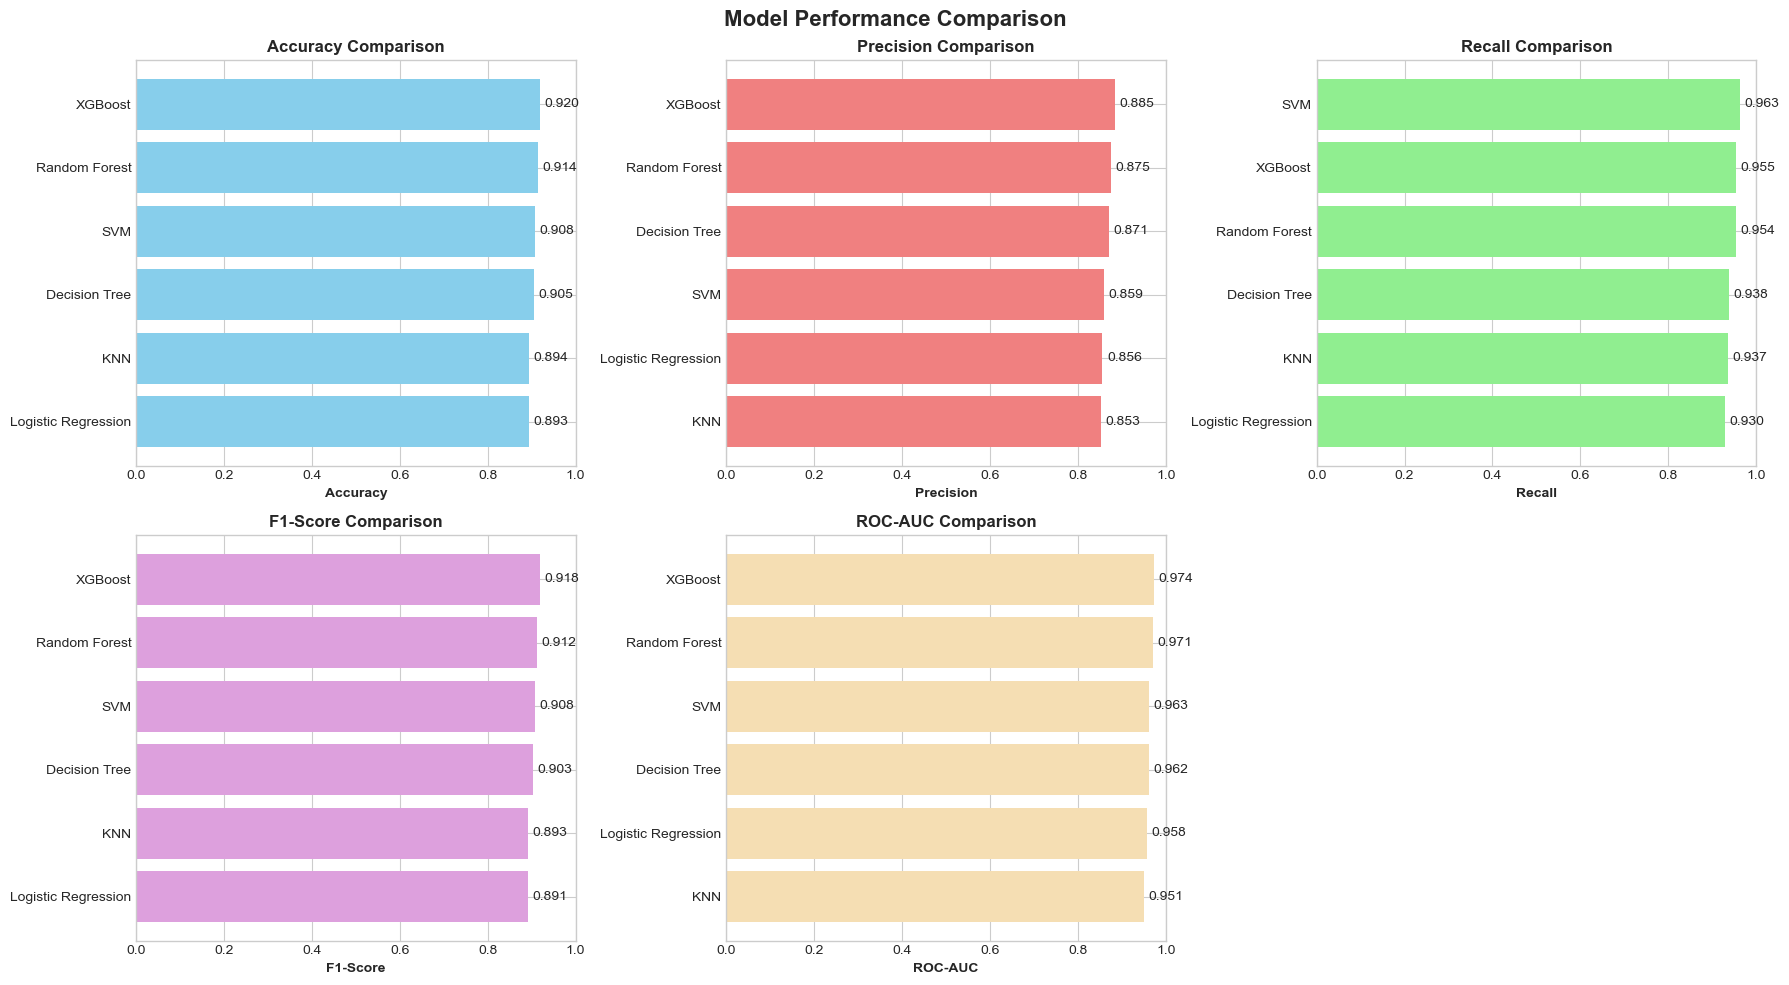


[2/4] Creating confusion matrices...
   ✅ Saved: confusion_matrices_all_models.png


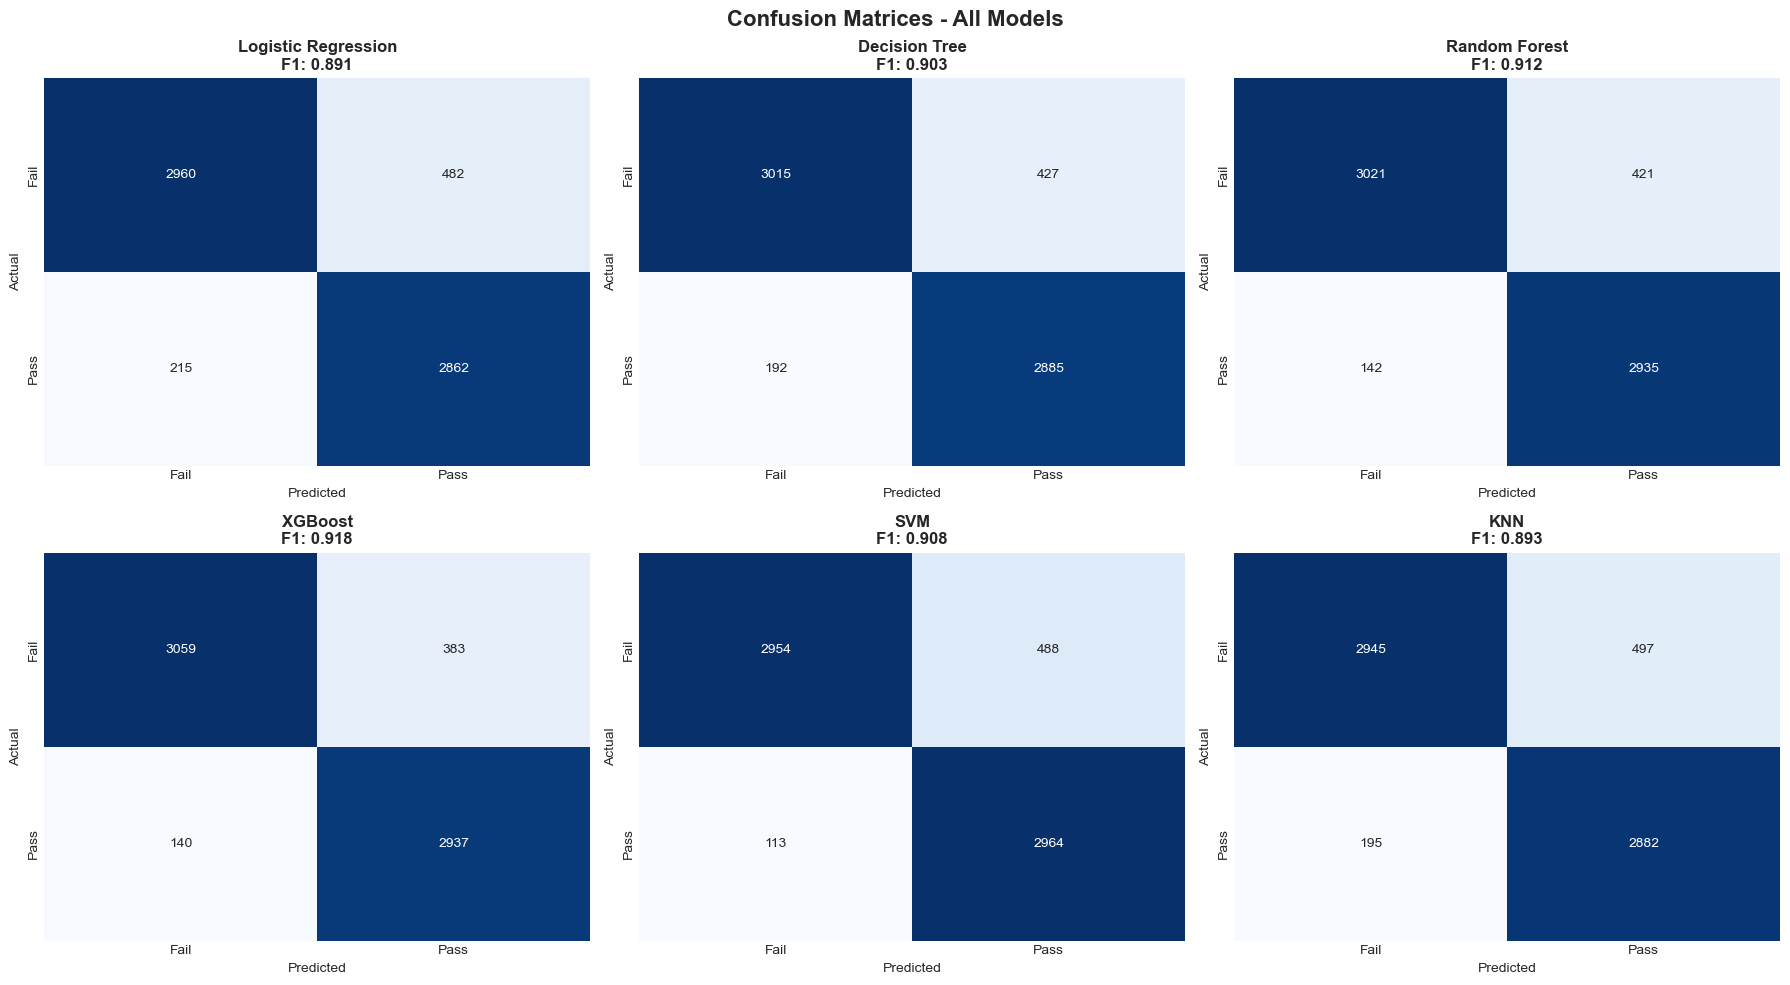


[3/4] Creating ROC curves...
   ✅ Saved: roc_curves.png


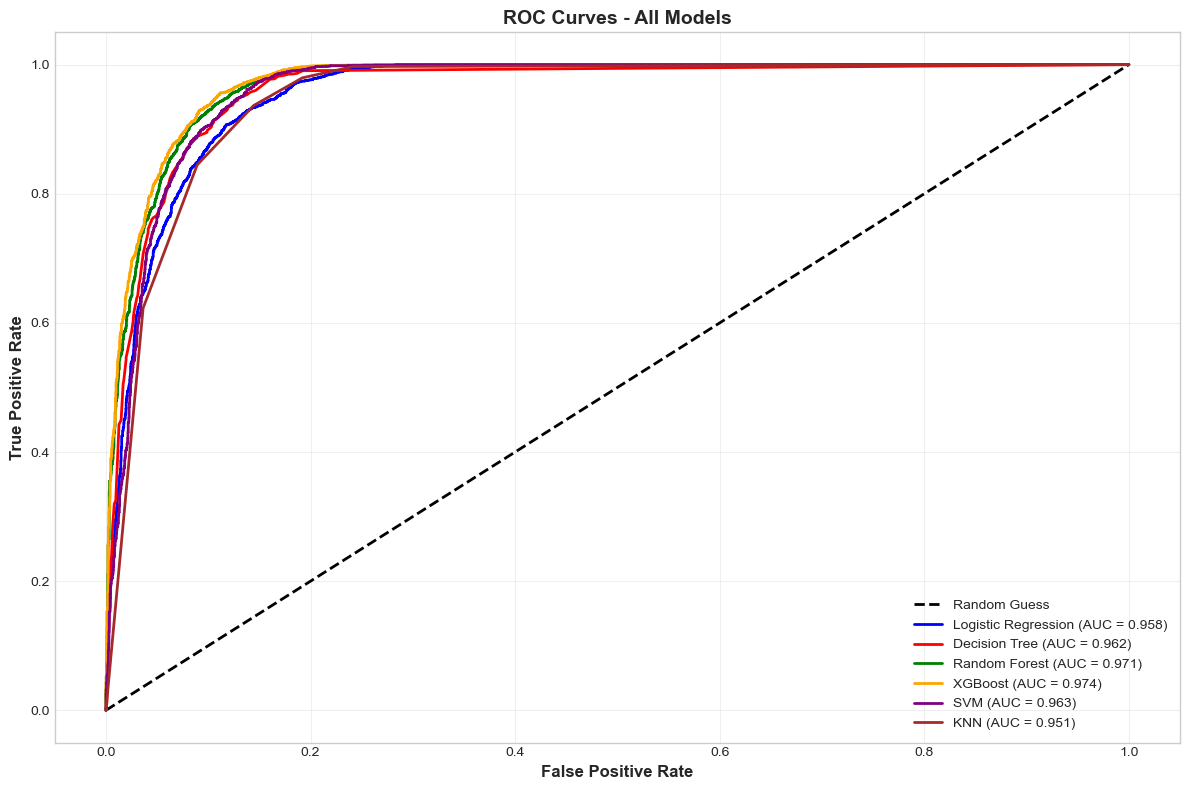


[4/4] Creating feature importance chart...
   ✅ Saved: feature_importance.png


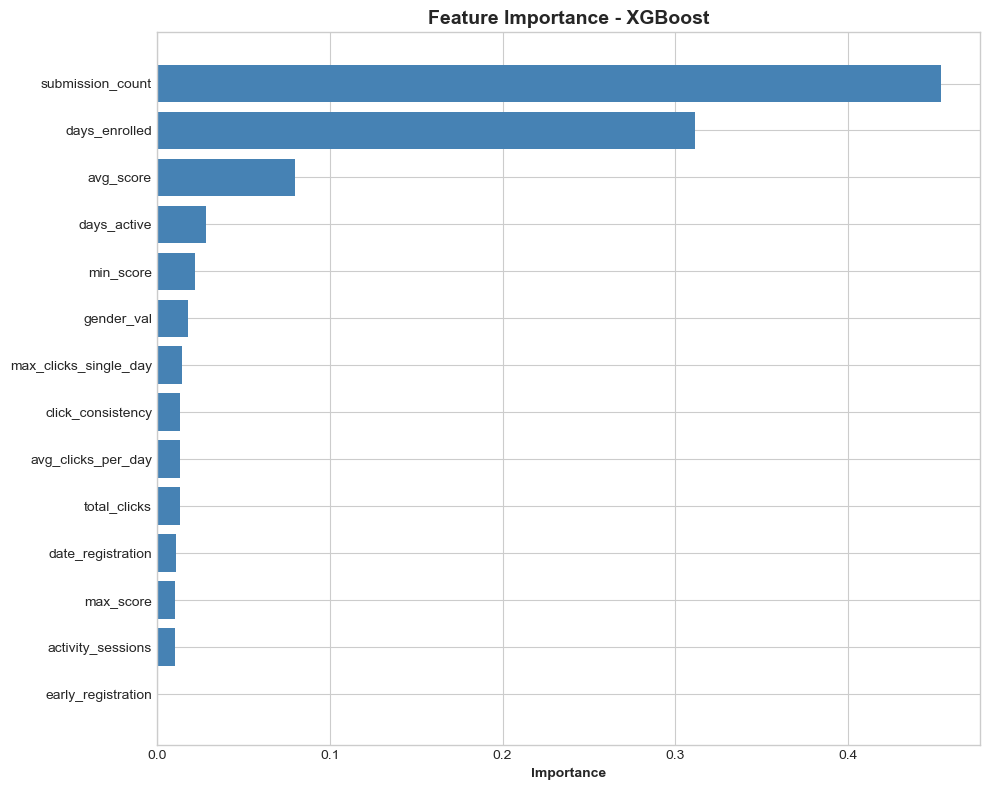

   ✅ Saved: feature_importance.csv

✅ ALL VISUALIZATIONS CREATED!


In [19]:
"""
═══════════════════════════════════════════════════════════════════
CELL 11: COMEBACK STORY DETECTION & ANALYSIS
═══════════════════════════════════════════════════════════════════
Identify students who start weak but finish strong
"""

print("="*70)
print("🎯 COMEBACK STORY ANALYSIS")
print("="*70)

print("\n[1/6] Loading and preparing assessment data...")

# Load detailed assessment data
assess_detailed = pd.read_csv('studentAssessment.csv')
assess_metadata = pd.read_csv('assessments.csv')

# Merge to get assessment dates
assess_detailed = assess_detailed.merge(
    assess_metadata[['id_assessment', 'date']], 
    on='id_assessment', 
    how='left'
)

print(f"   ✅ Loaded {len(assess_detailed):,} assessment submissions")

# Calculate early vs late performance
print("\n[2/6] Calculating temporal performance trends...")

# For each student, split their assessments into early/middle/late
student_trajectories = []

for student_id in assess_detailed['id_student'].unique():
    student_assessments = assess_detailed[assess_detailed['id_student'] == student_id].copy()
    
    if len(student_assessments) >= 3:  # Need at least 3 assessments
        # Sort by date
        student_assessments = student_assessments.sort_values('date')
        
        # Split into thirds
        n = len(student_assessments)
        early_third = student_assessments.iloc[:n//3]
        late_third = student_assessments.iloc[-(n//3):]
        
        # Calculate average scores
        early_score = early_third['score'].mean()
        late_score = late_third['score'].mean()
        
        # Calculate improvement
        improvement = late_score - early_score
        improvement_pct = (improvement / (early_score + 1)) * 100  # +1 to avoid div by zero
        
        student_trajectories.append({
            'id_student': student_id,
            'early_score': early_score,
            'late_score': late_score,
            'improvement': improvement,
            'improvement_pct': improvement_pct,
            'num_assessments': len(student_assessments)
        })

trajectory_df = pd.DataFrame(student_trajectories)
print(f"   ✅ Analyzed {len(trajectory_df):,} students with sufficient assessment data")

# Define "comeback" students
print("\n[3/6] Identifying comeback stories...")

# Comeback criteria: Started low (early < 60) AND improved significantly (>20 points)
trajectory_df['comeback_status'] = 'Stable'

trajectory_df.loc[
    (trajectory_df['early_score'] < 60) & (trajectory_df['improvement'] > 20),
    'comeback_status'
] = 'Comeback Kid'

trajectory_df.loc[
    (trajectory_df['early_score'] > 70) & (trajectory_df['improvement'] < -20),
    'comeback_status'
] = 'Burnout'

trajectory_df.loc[
    (trajectory_df['early_score'] > 70) & (trajectory_df['late_score'] > 70),
    'comeback_status'
] = 'Consistent Star'

trajectory_df.loc[
    (trajectory_df['early_score'] < 60) & (trajectory_df['late_score'] < 60),
    'comeback_status'
] = 'Struggler'

print("\n📊 Student Trajectory Types:")
print(trajectory_df['comeback_status'].value_counts())
print("\n📊 Percentages:")
print((trajectory_df['comeback_status'].value_counts() / len(trajectory_df) * 100).round(2))

# Merge with final outcomes
print("\n[4/6] Merging with outcomes...")
trajectory_df = trajectory_df.merge(
    master_df[['id_student', 'final_result', 'target', 'total_clicks', 'days_active']], 
    on='id_student', 
    how='left'
)

# Remove rows without outcome data
trajectory_df = trajectory_df.dropna(subset=['final_result'])

print(f"   ✅ {len(trajectory_df):,} students with complete trajectory data")

# Analyze outcomes by trajectory type
print("\n[5/6] Analyzing outcomes by trajectory type...")

outcome_by_trajectory = trajectory_df.groupby('comeback_status').agg(
    count=('id_student', 'count'),
    early_avg=('early_score', 'mean'),
    late_avg=('late_score', 'mean'),
    improvement_avg=('improvement', 'mean'),
    pass_rate=('target', lambda x: (x == 1).sum() / len(x) * 100 if len(x) > 0 else 0),
    avg_engagement=('total_clicks', 'mean')
).round(2)

print("\n📊 Performance by Trajectory Type:")
print(outcome_by_trajectory.to_string())

# Highlight comeback success rate
print("\n[6/6] Comeback success analysis...")

comeback_students = trajectory_df[trajectory_df['comeback_status'] == 'Comeback Kid']
if len(comeback_students) > 0:
    comeback_pass_rate = (comeback_students['target'] == 1).sum() / len(comeback_students) * 100
    print(f"\n🎯 COMEBACK KID SUCCESS RATE: {comeback_pass_rate:.1f}%")
    print(f"   • Total comeback students: {len(comeback_students)}")
    print(f"   • Average early score: {comeback_students['early_score'].mean():.2f}")
    print(f"   • Average late score: {comeback_students['late_score'].mean():.2f}")
    print(f"   • Average improvement: +{comeback_students['improvement'].mean():.2f} points")
    
    if comeback_pass_rate > 50:
        print(f"   ✅ Most comeback students succeed!")
    else:
        print(f"   ⚠️ Many comeback attempts still fail")

# Save results
trajectory_df.to_csv('Comeback_Analysis.csv', index=False)
print("\n💾 Saved: Comeback_Analysis.csv")

print("\n" + "="*70)
print("✅ COMEBACK STORY ANALYSIS COMPLETE!")
print("="*70)

In [20]:

print("="*70)
print("💾 SAVING MODELS & GENERATING REPORT")
print("="*70)

# ──────────────────────────────────────────────────────────────────
# 1. SAVE MODELS
# ──────────────────────────────────────────────────────────────────
print("\n[1/2] Saving trained models...")

# Save best model
best_model_filename = f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
with open(best_model_filename, 'wb') as f:
    pickle.dump(trained_models[best_model_name], f)
print(f"   ✅ Saved: {best_model_filename}")

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("   ✅ Saved: scaler.pkl")

# Save all models
with open('all_trained_models.pkl', 'wb') as f:
    pickle.dump(trained_models, f)
print("   ✅ Saved: all_trained_models.pkl")

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(available_features, f)
print("   ✅ Saved: feature_names.pkl")

# ──────────────────────────────────────────────────────────────────
# 2. GENERATE FINAL REPORT
# ──────────────────────────────────────────────────────────────────
print("\n[2/2] Generating final report...")

best_predictions = models_results[best_model_name]['predictions']
cm = confusion_matrix(y_test, best_predictions)

report_content = f"""
{'='*70}
STUDENT DISENGAGEMENT PREDICTOR - FINAL REPORT
{'='*70}

Project: Student Dropout Risk Prediction using OULAD Dataset
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

{'='*70}
DATASET SUMMARY
{'='*70}

Total Students Analyzed: {len(master_df)}
Training Samples: {len(X_train)}
Test Samples: {len(X_test)}

Target Distribution:
  - Fail/Withdrawn: {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.1f}%)
  - Pass/Distinction: {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.1f}%)

Features Used ({len(available_features)}):
{', '.join(available_features)}

{'='*70}
MODEL PERFORMANCE COMPARISON
{'='*70}

{comparison_df.to_string(index=False)}

{'='*70}
BEST MODEL
{'='*70}

Model: {best_model_name}
F1-Score: {best_f1:.4f}
Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}
Precision: {comparison_df.iloc[0]['Precision']:.4f}
Recall: {comparison_df.iloc[0]['Recall']:.4f}
ROC-AUC: {comparison_df.iloc[0]['ROC-AUC']:.4f}

{'='*70}
DETAILED CLASSIFICATION REPORT - {best_model_name}
{'='*70}

{classification_report(y_test, best_predictions, target_names=['Fail/Withdrawn', 'Pass/Distinction'])}

{'='*70}
CONFUSION MATRIX - {best_model_name}
{'='*70}

{cm}

True Negatives:  {cm[0][0]} (Correctly predicted Fail/Withdrawn)
False Positives: {cm[0][1]} (Predicted Pass but actually Failed)
False Negatives: {cm[1][0]} (Predicted Fail but actually Passed)
True Positives:  {cm[1][1]} (Correctly predicted Pass/Distinction)

Interpretation:
- The model correctly identified {cm[1][1]} students who would pass
- The model correctly identified {cm[0][0]} students at risk of failure
- {cm[0][1]} students were predicted to pass but failed (false alarms)
- {cm[1][0]} students were predicted to fail but passed (missed opportunities)

{'='*70}
KEY INSIGHTS
{'='*70}

1. Model Performance:
   The {best_model_name} achieved the best overall performance with an
   F1-score of {best_f1:.4f}, balancing precision and recall effectively.

2. Predictive Features:
   The most important factors for predicting student success/failure are:
"""

# Add feature importance if available
if best_model_name in ['Random Forest', 'XGBoost', 'Decision Tree']:
    best_model = trained_models[best_model_name]
    feature_importance_df = pd.DataFrame({
        'Feature': available_features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    report_content += "\n"
    for idx, row in feature_importance_df.head(5).iterrows():
        report_content += f"   - {row['Feature']}: {row['Importance']:.4f}\n"

report_content += f"""

3. Practical Application:
   This model can be used to identify at-risk students early in the semester,
   allowing for timely intervention and support. The model's {comparison_df.iloc[0]['Recall']:.1%}
   recall rate means it successfully identifies {comparison_df.iloc[0]['Recall']:.1%} of students who
   will struggle, providing valuable early warning signals.

{'='*70}
RECOMMENDATIONS
{'='*70}

1. Deploy {best_model_name} for production predictions
2. Set intervention threshold based on risk probability (e.g., > 70%)
3. Focus support on students with:
   - Low engagement (few clicks, inactive days)
   - Poor early assessment scores
   - Limited submission activity
4. Monitor model performance quarterly with new student cohorts
5. Retrain model with updated data each semester

{'='*70}
FILES GENERATED
{'='*70}

Data Files:
✓ Final_Student_Analysis.csv - Master dataset
✓ Pattern_Mining_Results.csv - Association rules (if generated)

Model Files:
✓ {best_model_filename} - Best performing model
✓ all_trained_models.pkl - All 6 trained models
✓ scaler.pkl - Feature scaler
✓ feature_names.pkl - Feature list for deployment

Performance Files:
✓ model_performance_comparison.csv - All model metrics
✓ feature_importance.csv - Feature rankings (if applicable)

Visualization Files:
✓ model_comparison_charts.png - Performance bar charts
✓ confusion_matrices_all_models.png - All confusion matrices
✓ roc_curves.png - ROC curve comparison
✓ feature_importance.png - Feature importance chart (if applicable)

Report:
✓ modeling_report.txt - This comprehensive report

{'='*70}
NEXT STEPS FOR DASHBOARD (PERSON D)
{'='*70}

Person D will need these files for the Streamlit dashboard:

Essential Files:
1. {best_model_filename} - For making predictions
2. scaler.pkl - For preprocessing new data
3. feature_names.pkl - List of required features
4. model_performance_comparison.csv - For comparison page

Optional Files:
5. All PNG visualizations - For embedding in dashboard
6. Final_Student_Analysis.csv - For data exploration page
7. Pattern_Mining_Results.csv - For insights page

{'='*70}
PROJECT STATUS: PHASE 3 COMPLETE ✅
{'='*70}

Timeline:
✅ Days 1-3: Data Cleaning
✅ Days 4-5: Feature Engineering
✅ Days 6-8: Predictive Modeling (COMPLETED)
⏳ Days 9-11: Dashboard Development (NEXT)
⏳ Days 12-14: Final Polish & Presentation

{'='*70}
END OF REPORT
{'='*70}
"""

# Save report
with open('modeling_report.txt', 'w') as f:
    f.write(report_content)

print("   ✅ Saved: modeling_report.txt")

# Print report to screen
print("\n" + "="*70)
print("📄 FINAL REPORT")
print("="*70)
print(report_content)

print("\n" + "="*70)
print("🎉 PROJECT PHASE 3 COMPLETE!")
print("="*70)
print(f"""
✅ Cleaned and merged 4 datasets
✅ Created {len(available_features)} predictive features
✅ Trained and evaluated 6 models
✅ Selected best model: {best_model_name}
✅ Generated visualizations and reports
✅ Saved all models and outputs

📦 Ready to hand off to Person D for dashboard!
""")

💾 SAVING MODELS & GENERATING REPORT

[1/2] Saving trained models...
   ✅ Saved: best_model_xgboost.pkl
   ✅ Saved: scaler.pkl
   ✅ Saved: all_trained_models.pkl
   ✅ Saved: feature_names.pkl

[2/2] Generating final report...
   ✅ Saved: modeling_report.txt

📄 FINAL REPORT

STUDENT DISENGAGEMENT PREDICTOR - FINAL REPORT

Project: Student Dropout Risk Prediction using OULAD Dataset
Generated: 2025-11-27 15:13:52

DATASET SUMMARY

Total Students Analyzed: 32593
Training Samples: 26074
Test Samples: 6519

Target Distribution:
  - Fail/Withdrawn: 17208 (52.8%)
  - Pass/Distinction: 15385 (47.2%)

Features Used (14):
gender_val, avg_score, max_score, min_score, submission_count, total_clicks, days_active, avg_clicks_per_day, max_clicks_single_day, activity_sessions, click_consistency, date_registration, days_enrolled, early_registration

MODEL PERFORMANCE COMPARISON

              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
            XGBoost    0.9198     0.8846  0.9545    0.9182